Дыновский Антон Денисович ИУ7 - 16Б
Лаба 5
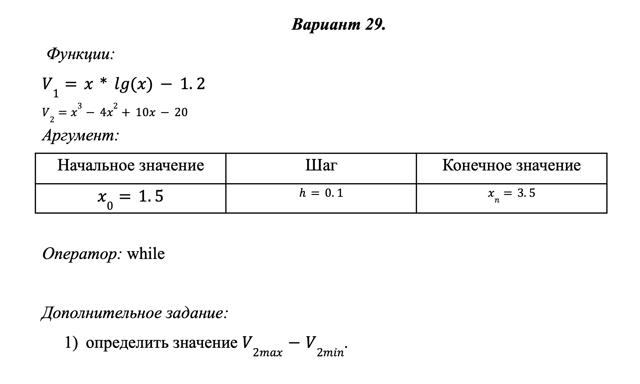

In [43]:
from math import log10

print("-"*33)
print(f"| {"x":^5} | {"y1":^10} | {"y2":^7} |\n{'-'*33}")

x = 1.5
max_y2, min_y2 = 0, 0
x_ticks_vals = []
y_vals = []
while x <= 3.5:
    y1 = x*log10(x) - 1.2
    y2 = x**3 - 4*x**2 + 10*x - 20
    x_ticks_vals.append(x)
    y_vals.append(y2)
    min_y2 = min(min_y2,y2)
    max_y2 = max(max_y2,y2)
    print(f"| {x:^5g} | {y1:<10g} | {y2:<7g} |")
    x = round(x+0.1,4)
print("-"*33) 

---------------------------------
|   x   |     y1     |   y2    |
---------------------------------
|  1.5  | -0.935863  | -10.625 |
|  1.6  | -0.873408  | -10.144 |
|  1.7  | -0.808237  | -9.647  |
|  1.8  | -0.740509  | -9.128  |
|  1.9  | -0.670368  | -8.581  |
|   2   | -0.59794   | -8      |
|  2.1  | -0.523339  | -7.379  |
|  2.2  | -0.44667   | -6.712  |
|  2.3  | -0.368026  | -5.993  |
|  2.4  | -0.287493  | -5.216  |
|  2.5  | -0.20515   | -4.375  |
|  2.6  | -0.121069  | -3.464  |
|  2.7  | -0.0353178 | -2.477  |
|  2.8  | 0.0520425  | -1.408  |
|  2.9  | 0.140954   | -0.251  |
|   3   | 0.231364   | 1       |
|  3.1  | 0.323221   | 2.351   |
|  3.2  | 0.41648    | 3.808   |
|  3.3  | 0.511096   | 5.377   |
|  3.4  | 0.607028   | 7.064   |
|  3.5  | 0.704238   | 8.875   |
---------------------------------


In [47]:
ticks = int(input("Введите кол-во засечек от 4 до 8")) 

In [58]:
width = 100

val_per_symbl = (max_y2 - min_y2) / width #какое значение соответствует одному символу

# --- Засечки (равномерные) ---
tick_step = (max_y2 - min_y2) / (ticks - 1) #шаг засечек
tick_positions = [] #позиция засечек
tick_labels = [] #значение засечек

j = 0
pos = 0
while j < ticks:
    tick_value = min_y2 + j * tick_step
    pos = int(round((tick_value - min_y2) / val_per_symbl)) #Делим разницу между значением текущей засечки и начальной на шаг за один символ, получаем позицию засечки от 0 до 100
    if j > 0 and tick_value * float(tick_labels[-1]) < 0: #добавляем значение засечки для 0, j > 0, чтобы сначала добавилась первая засечка
        pos0 = int(round((0 - min_y2) / val_per_symbl))
        tick_positions.append(pos0)
        tick_labels.append("0")
    tick_positions.append(pos)
    tick_labels.append(f"{tick_value:.2f}")
    j += 1

pairs = tuple(zip(tick_positions, tick_labels)) #Кортеж вида: (позиция засечки,наименование засечки)

#Вывод линейки засечек
offset = 5 #Отступ от начала строки для всех засечек
last_tick = 2
line = [" "] * (width + offset + last_tick) #Создание пустой линии

for k in range(len(tick_positions)):
    if tick_labels[k] != "0":
        pos = tick_positions[k] + offset #Определение позиции засечки + отступ от начала строки
        label = tick_labels[k] #"Название" засечки
        start = pos
        if start + len(label) > len(line): #Вывод последней засечки
            start = len(line) - len(label)
        for c in range(len(label)): #Заполняем нужное место строки символами числа
            line[start + c] = label[c]
    else: #Если засечка нуля, то пропускаем и не выводим его
        continue

print("".join(line)) #Вывод засечек

#Построение графика
for i in range(len(x_ticks_vals)):
    x = x_ticks_vals[i]
    y = y_vals[i]
    pos = int(round((y - min_y2) / val_per_symbl)) #Позиция звездочки
    row = [" "] * (width + offset)
    

    for t in pairs:
        p = t[0] #Позиция '|'
        if t[1] == "0":
            row[p] = "|"
    
    row[pos] = "*"

    print(f"{x:.1f} | {''.join(row)}")

     -10.62              -6.72               -2.83               1.07                4.97              8.88
1.5 | *                                                     |                                                  
1.6 |   *                                                   |                                                  
1.7 |      *                                                |                                                  
1.8 |         *                                             |                                                  
1.9 |           *                                           |                                                  
2.0 |              *                                        |                                                  
2.1 |                  *                                    |                                                  
2.2 |                     *                                 |                                               